### TASK01 - Introduction and EDA

Several of your friends live in Poland and are offered jobs at a US company with many locations all across the country. The job offers are great but news with headlines such as “America is one of 6 countries that make up more than half of guns deaths worldwide” have them worried. Charts like this make them worry even more:

You want to convince your friends that the US is a large and diverse country with 50 very different states as well as the District of Columbia (DC). Use data from the US gun violence dataset.

Problems and Questions:

1)     What is the state with the most murders? Would you say this is the most dangerous state? Hint: Make a plot showing the relationship between population size (search for current data)  and number of murders.

2)     Create new csv dataset with the following structure:

a)      Column 1: state

b)     Column 2: population

c)      Column 3: murders_total

d)     Column 4: murder_rate

3)     Describe the distribution of murder rates across states. How similar are states? How much do murder rates vary by geographical regions? Provide conclusions and recommendations for your friends.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Uploading dataset
df = pd.read_csv('./data/guns.csv',encoding = "ISO-8859-1")
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,latitude,longitude
0,461105,1/1/2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,40.3467,-79.8559
1,460726,1/1/2013,California,Hawthorne,13500 block of Cerise Avenue,1,3,33.9090,-118.3330
2,478855,1/1/2013,Ohio,Lorain,1776 East 28th Street,1,3,41.4455,-82.1377
3,478925,1/5/2013,Colorado,Aurora,16000 block of East Ithaca Place,4,0,39.6518,-104.8020
4,478959,1/7/2013,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,36.1140,-79.9569


In [6]:
#checking for null values/missing values
df.isnull().any()

incident_id       False
date              False
state             False
city_or_county    False
address            True
n_killed          False
n_injured         False
latitude           True
longitude          True
dtype: bool

From above we see that the address, latitude and longitude columns have some missing data. For the sake of the questions asked we will not deal with these columns hence can be ignored for now.

In [7]:
#Calculating the state with the highest number of murders
n_killed_total = df.groupby('state')['n_killed'].sum().sort_values(ascending = False)
n_killed_total.head()

state
California    5562
Texas         5046
Florida       3909
Illinois      3409
Ohio          2508
Name: n_killed, dtype: int64

1(a) California state has the highest number of murders. Let's plot the scatter plot to check if there is a direct relationship between the state population and the number of murders. Note: Estimated population of the states were retrieved from https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html

In [8]:
#Uploading the population data set
usa_pop = pd.read_csv('./data/usa_pop_2019.csv',encoding = "ISO-8859-1")
usa_pop.head()

,state,population
0,Alabama,4903185.0
1,Alaska,731545.0
2,Arizona,7278717.0
3,Arkansas,3017804.0
4,California,39512223.0


In [9]:
#check if some data are missing
usa_pop.isnull().any()

state         False
population    False
dtype: bool

In [10]:
#merge data state population and total number of murders in a state
m_p = pd.merge(usa_pop,n_killed_total, on='state')
m_p.head()

,state,population,n_killed
0,Alabama,4903185.0,1880
1,Alaska,731545.0,267
2,Arizona,7278717.0,1094
3,Arkansas,3017804.0,773
4,California,39512223.0,5562


In [11]:
#ensuring data is clean// all states are filled with data
m_p.isnull().any()

state         False
population    False
n_killed      False
dtype: bool

Text(0.5, 0, 'state population')

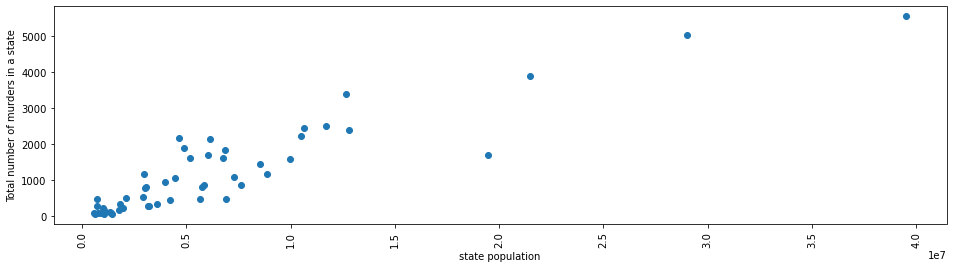

In [12]:
fig = plt.figure(figsize = (16,4))
plt.scatter(m_p['population'],m_p['n_killed'])
_=plt.xticks(rotation = 'vertical')
plt.ylabel('Total number of murders in a state')
plt.xlabel('state population')

1(b): Would you say 'CALIFORNIA' is the most dangerous state: It is hard to say so at this stage because there is no direct relationship between state population and the number of murders as per above scatter plot. We will answer this question later when we plot the relationship between a state and its murders rate.

In [13]:
#creation of the new data set with the suggested column names and exporting them to the file named 'new_data_set.csv'
new_data = pd.merge(usa_pop,df.groupby('state')['n_killed'].sum(),left_on = 'state',right_on = 'state')
new_data = new_data.rename(columns={'n_killed':'murders_total'})
new_data['murder_rate/10000'] = (new_data['murders_total']/new_data['population'])*10000
new_data.to_csv('./data/new_data_set.csv', index = False)

In [14]:
#confirming if the csv file were created
usa_pop = pd.read_csv('./data/new_data_set.csv',encoding = "ISO-8859-1")
usa_pop.head()

,state,population,murders_total,murder_rate/10000
0,Alabama,4903185.0,1880,3.834242
1,Alaska,731545.0,267,3.649810
2,Arizona,7278717.0,1094,1.503012
3,Arkansas,3017804.0,773,2.561465
4,California,39512223.0,5562,1.407666


Text(0.5, 1.0, 'State Total Murder Rate vs State')

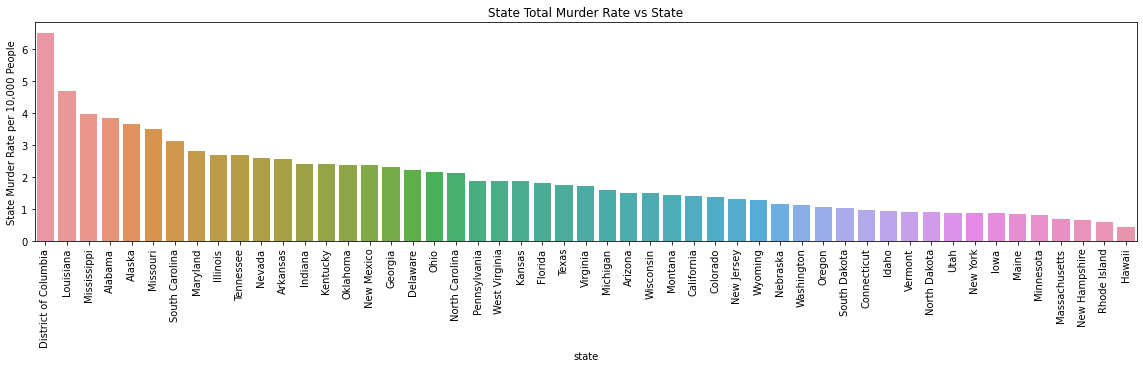

In [15]:
#plotting a bar graph between state and murder_rate
fig = plt.figure(figsize=(16,5))
sns.barplot(x ='state',y = 'murder_rate/10000', data = new_data, order = new_data.sort_values('murder_rate/10000',ascending = False).state)
_=plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.ylabel('State Murder Rate per 10,000 People')
plt.title('State Total Murder Rate vs State')

3-- Notes:
From the plot above we see that, 

->District of Columbia has the most murder of around 6  per every 10,000 people

->Hawaii has the least murder of about 0.5 per every 10,000 people

->Some of the states such as Illinois and Tennessee,Nevada and Arkansas, etc exhibits around similar murder rate.

We may therefore comfortably state that California is not the most dangerous state interms of murders, but District of Columbia it is.

To check how the murder rate is distributed geographically, we distributed the states into regions from the reference: https://www2.census.gov/programs-surveys/popest/geographies/2016/state-geocodes-v2016.xls

In [16]:
#upload data set
regions = pd.read_csv('./data/state-geocodes-v2015.csv')
regions.head()

,state,Region
0,Connecticut,Northeast
1,Maine,Northeast
2,Massachusetts,Northeast
3,New Hampshire,Northeast
4,Rhode Island,Northeast


In [17]:
#merge regions with usa_pop
new_data_region = pd.merge(new_data,regions,left_on='state',right_on ='state')
new_data_region.head()

,state,population,murders_total,murder_rate/10000,Region
0,Alabama,4903185.0,1880,3.834242,South
1,Alaska,731545.0,267,3.649810,West
2,Arizona,7278717.0,1094,1.503012,West
3,Arkansas,3017804.0,773,2.561465,South
4,California,39512223.0,5562,1.407666,West


In [18]:
#checking the missing data
new_data_region.isnull().any()

state                False
population           False
murders_total        False
murder_rate/10000    False
Region               False
dtype: bool

In [19]:
#Calculate murder rate regionwise
murder_rate_total = new_data_region.groupby('Region').sum()
murder_rate_total['murder_rate_total/10000']=(murder_rate_total['murders_total']/murder_rate_total['population'])*10000
murder_rate_total.reset_index(inplace = True)
murder_rate_total.head()

,Region,population,murders_total,murder_rate/10000,murder_rate_total/10000
0,Midwest,68329004.0,13771,20.404233,2.015396
1,Northeast,55982803.0,6401,8.692061,1.143387
2,South,125580448.0,29246,48.699092,2.328866
3,West,78347268.0,11050,20.030762,1.410387


Text(0.5, 1.0, 'Region Total Murder Rate vs Region')

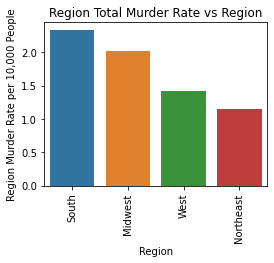

In [20]:
# A bar plot to show how the murder rate is distributed regionwise
fig = plt.figure(figsize=(4,3))
sns.barplot(x ='Region',y = 'murder_rate_total/10000', data = murder_rate_total, order = murder_rate_total.sort_values('murder_rate_total/10000',ascending = False).Region)
_=plt.xticks(rotation = 'vertical')
#plt.tight_layout()
plt.ylabel('Region Murder Rate per 10,000 People')
plt.title('Region Total Murder Rate vs Region')

It is clear from the plot above that, South zone of USA is the most dangerous and Northeast is the least dangerous

Conclusion: 

From the given data set,

While other factors remain constant and considering only the murder rate, We would advise our friend to use the plotted bar chart to select a place for work in USA, with the least dangerous state being Hawaii and the most dangerous being the District of Columbia. Our friend may decide as well to work in Northeast part of USA than the Southern part.